In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/CRmeta/CRdata
#%cd /content/drive/MyDrive/Colab\ Notebooks
!pip install -U tensorflow-addons

/content/drive/My Drive/CRmeta/CRdata
     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
WS = pd.read_excel('label_2016Q4-2013.xlsx',sheet_name='Label')
labels = np.array(WS)

In [ ]:
labels.shape
y = labels[:,1]
from numpy import genfromtxt
from sklearn.utils import shuffle

df1 = pd.read_csv('2016_year_Q4_CR_data.csv')
df2 = pd.read_csv('2015_year_Q4_CR_data.csv')
df3 = pd.read_csv('2014_year_Q4_CR_data.csv')
x = np.array(df1)
x1 = np.array(df1)
x2 = np.array(df1)
x3 = np.array(df1)
x_new = np.vstack((x1,np.vstack((x2,x3))))
y_new = np.append(labels[:,1],np.append(labels[:,5],labels[:,9]))
print(x_new.shape)
print(y_new.shape)

x,y = shuffle(x_new,y_new,random_state=42)

(2703, 28)
(2703,)


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=None)

#making it zero based so to_categorical can work
y_train=y_train-1
y_test=y_test-1

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.layers import Reshape
from keras import regularizers
from tensorflow.keras.optimizers import SGD,Adam
from keras.utils.np_utils import to_categorical

In [ ]:
%%capture
%%bash
pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall_m = true_positives / (all_positives + K.epsilon())
    return recall_m

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_m = true_positives / (predicted_positives + K.epsilon())
    return precision_m

def f1_score(y_true, y_pred):
    precision_m = precision(y_true, y_pred)
    recall_m = recall(y_true, y_pred)
    return 2*((precision_m*recall_m)/(precision_m+recall_m+K.epsilon()))

In [ ]:
import tensorflow.keras.backend as K


def pixel_normalization(x):
  x=x- K.min(x,axis=(1,2),keepdims=True)
  #print("here")
  x/=(K.max(x,axis=(1,2),keepdims=True)-K.min(x,axis=(1,2),keepdims=True))
  #print("here2")
  x*=255
  return x



In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
# #from cosine_annealing import TrainHistory
# from tensorflow.keras.callbacks import EarlyStopping
# #TrainHistory(n_epochs=0,n_cycles=0,lrate_max=0,warmup_rate=0,normal=True)
# #EarlyStopping('val_loss', patience = 100)
# img_size=64
# model = Sequential()
# model.add(Dense(img_size*img_size*3,input_shape=(x_train.shape[1],),use_bias=True))
# model.add(Reshape((img_size,img_size,3)))
# model.add(Lambda(pixel_normalization))

# model.add(Conv2D(filters = 64,kernel_size=5,strides=(1,1),activation='relu',padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(1e-6),name="first_layer"))
# model.add(MaxPooling2D(pool_size=2,padding='same',name="first_maxpool"))
# model.add(Conv2D(filters = 96,kernel_size=3,strides=(1,1),activation='relu',padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(1e-6),name="second_layer"))
# model.add(MaxPooling2D(pool_size=2,padding='same',name="second_maxpool"))
# model.add(Conv2D(filters = 128,kernel_size=3,strides=(1,1),activation='relu',padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(1e-6),name="thrid_layer"))
# model.add(MaxPooling2D(pool_size=2,padding='same',name="third_maxpool"))

# model.add(Flatten())
# model.add(Dense(4,activation='softmax'))

# #batch_size,dropout,stride,regularizationstr,epochs,num_layers

# #bounds =[(2,11),(0,0.5),(1,4),(0,1e-3),(10,30),(3,8)]

# optim = SGD(learning_rate = 0.00001, decay=1e-8, nesterov=True)
# #optim = SGD(learning_rate = 0.00001, momentum=0.99, nesterov=True)
# #optim = Adam(learning_rate=1e-5)

# # Train model

# print(model.summary())



# model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy',recall,precision,f1_score])
# model = model.fit(x_train, y_train_cat,validation_data=(x_test, y_test_cat), batch_size=4, epochs=2)


In [ ]:
# print(model.history['val_f1_score'][-1])

In [ ]:
# from tensorflow.keras.layers import Layer
# class Residual(Layer):
#     def __init__(self, channels_in,kernel,**kwargs):
#         super(Residual, self).__init__(**kwargs)
#         self.channels_in = channels_in
#         self.kernel = kernel

#     def call(self, x):
#         # the residual block using Keras functional API
#         first_layer =   Activation("linear", trainable=False)(x)
#         x =             Conv2D( self.channels_in,
#                                 self.kernel,
#                                 padding="same")(first_layer)
#         x =             Activation("relu")(x)
#         x =             Conv2D( self.channels_in,
#                                 self.kernel,
#                                 padding="same")(x)
#         residual =      Add()([x, first_layer])
#         x =             Activation("relu")(residual)
#         return x

#     def compute_output_shape(self, input_shape):
#         return input_shape

In [ ]:
# #from tensorflow.keras.layers import Conv2D,Activation,Add
# class Residual(Layer):
#     def __init__(self, channels_in,kernel,strides,kernel_regularizer=None,**kwargs):
#         super(Residual, self).__init__(**kwargs)
#         self.channels_in = channels_in
#         self.kernel = kernel
#         self.strides=strides
#         self.kernel_regularizer=kernel_regularizer

#     def call(self, x):
#         # the residual block using Keras functional API
#         first_layer =   Activation("linear", trainable=False)(x)
#         x0 =             Conv2D( self.channels_in,
#                                 self.kernel,
#                                 strides=self.strides,
#                                 padding="same",kernel_initializer='he_normal',kernel_regularizer=self.kernel_regularizer)(first_layer)
#         x1 =             Activation("relu")(x0)
#         x2 =             Conv2D( self.channels_in,
#                                 self.kernel,
#                                 strides=self.strides,
#                                 padding="same",kernel_initializer='he_normal',kernel_regularizer=self.kernel_regularizer)(x1)
#         residual =      Add()([x2, first_layer])
#         x3 =             Activation("relu")(residual)
#         return x3

#     def compute_output_shape(self, input_shape):
#         return input_shape

(2162, 28)
(2162,)
(541, 28)
(541,)
4
curr:  learning_rate,optimizer,img_channels,dropout_rate, stride, regularization_strength, num_layers,num_residual_layers,num_filters,keep_instance,init_kernel,kernel_size,fc_layers,fc_activation,fc_size,keep_batchnorm
curr:  2e-06 Adam 3 0.001 1 1e-06 1 1 128 False 3 3 0 relu 100 False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


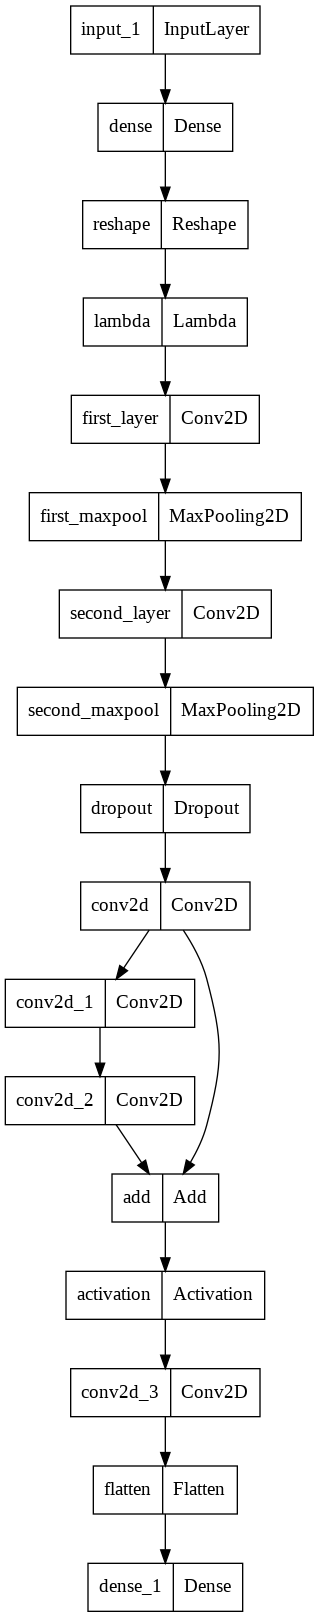

In [ ]:
from tensorflow.keras.layers import Conv2D,Lambda,Reshape,Dense,MaxPooling2D,Input
from tensorflow.keras import Model
from tensorflow_addons.layers import InstanceNormalization
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#from cosine_annealing import TrainHistory
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import PredefinedSplit
#th = TrainHistory(n_cycles=3,lrate_max=0.001,warmup_rate=0.0005,normal=True)
#EarlyStopping('val_loss', patience = 100)
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
img_size=64
final_layer_size = np.unique(y).shape[0]
print(final_layer_size)

def createmodel(learning_rate,optimizer,img_channels,dropout_rate, stride, regularization_strength, num_layers,num_residual_layers,num_filters,keep_instance,init_kernel,kernel_size,fc_layers,fc_activation,fc_size,keep_batchnorm):
  print("curr: ","learning_rate,optimizer,img_channels,dropout_rate, stride, regularization_strength, num_layers,num_residual_layers,num_filters,keep_instance,init_kernel,kernel_size,fc_layers,fc_activation,fc_size,keep_batchnorm")
  print("curr: ",learning_rate,optimizer,img_channels,dropout_rate, stride, regularization_strength, num_layers,num_residual_layers,num_filters,keep_instance,init_kernel,kernel_size,fc_layers,fc_activation,fc_size,keep_batchnorm)
  dropout_rate = dropout_rate
  #model = Sequential()
  inputs = Input(shape=(x_train.shape[1],))
  l1=Dense(img_size*img_size*img_channels,input_shape=(x_train.shape[1],),use_bias=True)(inputs)
  l2=Reshape((img_size,img_size,img_channels))(l1)
  if(keep_instance):
    l3=InstanceNormalization()(l2)
  else:
    l3=Lambda(pixel_normalization)(l2)

  l4=Conv2D(filters = 64,kernel_size=init_kernel,strides=stride,activation='relu',padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(regularization_strength),name="first_layer")(l3)
  l5=MaxPooling2D(pool_size=2,padding='same',name="first_maxpool")(l4)
  if(keep_batchnorm):
    l5=BatchNormalization()(l5)
  l6=Conv2D(filters = 96,kernel_size=kernel_size,strides=stride,activation='relu',padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(regularization_strength),name="second_layer")(l5)
  l7=MaxPooling2D(pool_size=2,padding='same',name="second_maxpool")(l6)
  l7=Dropout(dropout_rate)(l7)
  
  #for i in range(num_layers): 
   #Conv2D(filters = num_filters,kernel_size=kernel_size,strides=stride,activation='relu',padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(regularization_strength),name="layer"+str(i+3))
    #MaxPooling2D(pool_size=2,padding='same',name="maxpool"+str(i+3))
    #print("i is ",i)
  #model.add(Residual(128,3))#,strides=stride,kernel_regularizer=regularizers.l2(regularization_strength)))
  for i in range(num_residual_layers):
    l75=Conv2D(filters = num_filters,kernel_size=kernel_size,strides=stride,activation='relu',padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(regularization_strength))(l7)
    l8=Conv2D(filters = num_filters,kernel_size=kernel_size,strides=stride,activation='relu',padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(regularization_strength))(l75)
    l9 = Conv2D(filters = num_filters,kernel_size=kernel_size,strides=stride,activation=None,padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(regularization_strength))(l8)
    l10=Add()([l75,l9])
    l11 = Activation('relu')(l10)
    l7=l11

  for i in range(num_layers):
    l115=Conv2D(filters = num_filters*2,kernel_size=kernel_size,strides=stride,activation='relu',padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(regularization_strength))(l7)
    if(keep_batchnorm):
      l7=BatchNormalization()(l115)
    else:
      l7=l115
  l12=Flatten()(l7)
  for i in range(fc_layers):
    l12=Dense(fc_size,activation=fc_activation)(l12)
    l12=Dropout(dropout_rate)(l12)

  
  logits=Dense(final_layer_size,activation='softmax')(l12)

  #batch_size,dropout,stride,regularizationstr,epochs,num_layers

  #bounds =[(2,11),(0,0.5),(1,4),(0,1e-3),(10,30),(3,8)]

  #optim = SGD(learning_rate = 0.00001, decay=1e-8, nesterov=True)
  if(optimizer=="SGD"):
    optim = SGD(learning_rate = learning_rate, momentum=0.99, nesterov=True)
  else:
    #optim = Adam(learning_rate=learning_rate)
    optim = SGD(learning_rate = learning_rate, decay=learning_rate/1000, nesterov=True)
  model = Model(inputs=inputs,outputs=logits)
  # Train model
  
  #print(model.summary())



  model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy',recall,precision,f1_score])
  # model = model.fit(x_train, y_train_cat,validation_data=(x_test, y_test_cat), batch_size=4, epochs=2)
  return model
#th = TrainHistory(epochs=10,n_cycles=3,lrate_max=0.001,warmup_rate=0.0005,normal=True)
model =  KerasClassifier(build_fn = createmodel,verbose=True)#,callbacks=[EarlyStopping(patience=4,monitor='f1_score')])  

#def createmodel(learning_rate,optimizer,img_channels,dropout_rate, stride, regularization_strength, num_layers,num_residual_layers,num_filters,keep_instance,init_kernel,kernel_size,fc_layers,fc_activation,fc_size,keep_batchnorm):
#param_grid={'batch_size': [1], 'dropout_rate': [10], 'stride':[1],'regularization_strength':[0.001], 'epochs': [4], 'num_layers':[1],'num_filters':[128]}
#param_grid={'batch_size': [3,5,7,10], 'dropout_rate': [0,0.25,0.5], 'stride':[1],'regularization_strength':[1e-7,1e-6,1e-4,1e-3,0], 'epochs': [25,30,35], 'num_layers':[2,1,3],'num_filters':[96,128,256],'learning_rate':[1e-5,1e-6,1e-4,1e-3],'img_channels':[3,4,5],'num_residual_layers':[1,2],
#'keep_instance':[True,False],'init_kernel':[3,5],'kernel_size':[3,5],'fc_layers':[1,2],'fc_activation':['relu','sigmoid'],'fc_size':[200,400],
#'keep_batchnorm':[True,False],'optimizer':["SGD","Adam"]}

param_grid={'batch_size': [3], 'dropout_rate': [0.001,0.2], 'stride':[1],'regularization_strength':[1e-6], 'epochs': [50], 'num_layers':[1],'num_filters':[128],'learning_rate':[3e-6],'img_channels':[3],'num_residual_layers':[0,1],
'keep_instance':[False,True],'init_kernel':[3],'kernel_size':[3],'fc_layers':[0,1],'fc_activation':['relu'],'fc_size':[100],
'keep_batchnorm':[False,True],'optimizer':["Adam","SGD"]}
x_train_new = np.vstack((x_train,x_test))
y_train_new = np.vstack((y_train_cat,y_test_cat))


model = createmodel(2e-06,"Adam",3,0.001,1,1e-06,1,1,128,False,3,3,0,'relu',100,False)
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')
#history=model.fit(x_train,y_train_cat,validation_data=(x_test,y_test_cat),batch_size=3,epochs=50,verbose=True)

# print(x_train_new.shape)
# print(y_train_new.shape)

# split_index = np.zeros(x_train_new.shape[0])
# split_index[:x_train.shape[0]]=-1
# pds = PredefinedSplit(test_fold = split_index)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=pds)
# grid.fit(x_train_new,y_train_new)

In [ ]:
# import pandas as pd
# hist_df = pd.DataFrame(history.history) 
# hist_csv_file = 'history.csv'
# with open(hist_csv_file, mode='w') as f:
#     hist_df.to_csv(f)

In [ ]:
#self,epochs=0,n_cycles=0,lrate_max=0,warmup_rate=0,normal=True)
from cosine_annealing_print import TrainHistory
cosine_model = createmodel(2e-06,"Adam",3,0.001,1,1e-03,1,1,128,False,3,3,0,'relu',100,False)
th=TrainHistory(epochs=140,n_cycles=4,lrate_max=5e-06,warmup_rate=2e-06,normal=True)
history2=cosine_model.fit(x_train,y_train_cat,validation_data=(x_test,y_test_cat),batch_size=3,epochs=140,verbose=True,callbacks=[th])


curr:  learning_rate,optimizer,img_channels,dropout_rate, stride, regularization_strength, num_layers,num_residual_layers,num_filters,keep_instance,init_kernel,kernel_size,fc_layers,fc_activation,fc_size,keep_batchnorm
curr:  2e-06 Adam 3 0.001 1 0.001 1 1 128 False 3 3 0 relu 100 False
initalized with epochs 140
Epoch is 0 New LR is 2e-06 Epochs are 140
Epoch 1/140
721/721 [==============================] - 29s 21ms/step - loss: 39.0484 - accuracy: 0.4130 - recall: 0.4122 - precision: 0.4129 - f1_score: 0.4124 - val_loss: 12.9749 - val_accuracy: 0.3641 - val_recall: 0.3573 - val_precision: 0.3628 - val_f1_score: 0.3595
Epoch is 1 New LR is 4.989935734988098e-06 Epochs are 140
Epoch 2/140
721/721 [==============================] - 13s 18ms/step - loss: 9.8322 - accuracy: 0.4468 - recall: 0.4454 - precision: 0.4485 - f1_score: 0.4466 - val_loss: 6.0246 - val_accuracy: 0.4214 - val_recall: 0.4180 - val_precision: 0.4245 - val_f1_score: 0.4206
Epoch is 2 New LR is 4.959823971496575e-06 Ep

In [ ]:
# def func(hyperparams):
#   #batch_size,dropout,stride,regularizationstr,epochs,num_layers

#   #bounds =[(2,11),(0,0.5),(1,3),(0,1e-3),(10,30),(1,3)]
#   img_size=64
#   bs,dp,stride,regstr,epch,nl = hyperparams
#   bs = (int)bs
#   stride =(int)stride
#   epch = (int)epch
#   #nl=(int)nl
  

#   model = Sequential()
#   model.add(Dense(img_size*img_size*3,input_shape=(x_train.shape[1],),use_bias=True))
#   model.add(Reshape((img_size,img_size,3)))
#   model.add(Lambda(pixel_normalization))

#   model.add(Conv2D(filters = 64,kernel_size=5,strides=(stride,stride),activation='relu',padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(regstr),name="first_layer"))
#   model.add(MaxPooling2D(pool_size=2,padding='same',name="first_maxpool"))
#   model.add(Conv2D(filters = 96,kernel_size=3,strides=(stride,stride),activation='relu',padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(regstr),name="second_layer"))
#   model.add(MaxPooling2D(pool_size=2,padding='same',name="second_maxpool"))
#   model.add(Conv2D(filters = 128,kernel_size=3,strides=(stride,stride),activation='relu',padding='same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(regstr),name="thrid_layer"))
#   model.add(MaxPooling2D(pool_size=2,padding='same',name="third_maxpool"))

#   model.add(Flatten())
#   model.add(Dense(4,activation='softmax'))

#   #batch_size,dropout,stride,regularizationstr,epochs,num_layers

#   #bounds =[(2,11),(0,0.5),(1,4),(0,1e-3),(10,30),(3,8)]

#   optim = SGD(learning_rate = 0.00001, decay=1e-8, nesterov=True)
#   #optim = SGD(learning_rate = 0.00001, momentum=0.99, nesterov=True)
#   #optim = Adam(learning_rate=1e-5)

#   # Train model

#   #print(model.summary())



#   model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy',recall,precision,f1_score])
#   model = model.fit(x_train, y_train_cat,validation_data=(x_test, y_test_cat), batch_size=bs, epochs=epch)
#   return 1-model.history['val_f1_score'][-1]



In [ ]:
# import matplotlib.pyplot as plt

In [ ]:
# plt.plot(model.history['accuracy'])
# plt.plot(model.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
# plt.clf()
# plt.plot(model.history['precision'])
# plt.plot(model.history['val_precision'])
# plt.title('model precision')
# plt.ylabel('precision')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
# plt.clf()
# plt.plot(model.history['recall'])
# plt.plot(model.history['val_recall'])
# plt.title('model recall')
# plt.ylabel('recall')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
# plt.clf()
# plt.plot(model.history['f1_score'])
# plt.plot(model.history['val_f1_score'])
# plt.title('model f1')
# plt.ylabel('f1')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()